In [2]:
#se importan las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

Hipótesis: 

- Existe una correlación significativa entre la condición climática y la severidad de los accidentes, lo que sugiere que el mal clima incrementa el riesgo de accidentes graves.

- Las horas con mayor cantidad de accidentes coinciden con el inicio y finalización de la jornada laboral (aproximadamente entre las 7-9 AM y 5-7 PM), lo que indica que la mayor movilidad en estos horarios incrementa la probabilidad de incidentes.

- Los accidentes que ocurren en la madrugada tienden a ser más graves en términos de daños y lesiones, posiblemente debido a factores como la fatiga de los conductores, menor visibilidad y mayor presencia de conductores bajo efectos de sustancias.

In [3]:
#se importa el set de datos
df = pd.read_csv('traffic_accidents.csv', sep=",")
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


Análisis Exploratorio de Datos (EDA) y el preprocesamiento de los datos:

In [4]:
#vemos el nombre de todas las columnas que tenemos
df.columns

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')

In [5]:
# Renombrar las columnas a español
df = df.rename(columns={
    "crash_date": "fecha_accidente",
    "traffic_control_device": "dispositivo_control_trafico",
    "weather_condition": "condicion_climatica",
    "lighting_condition": "condicion_iluminacion",
    "first_crash_type": "tipo_choque_inicial",
    "trafficway_type": "tipo_via",
    "alignment": "alineacion_via",
    "roadway_surface_cond": "condicion_superficie",
    "road_defect": "defecto_vial",
    "crash_type": "tipo_accidente",
    "intersection_related_i": "relacion_interseccion",
    "damage": "nivel_daño",
    "prim_contributory_cause": "causa_principal",
    "num_units": "num_vehiculos",
    "most_severe_injury": "lesion_mas_grave",
    "injuries_total": "total_lesiones",
    "injuries_fatal": "lesiones_fatales",
    "injuries_incapacitating": "lesiones_incapacitantes",
    "injuries_non_incapacitating": "lesiones_no_incapacitantes",
    "injuries_reported_not_evident": "lesiones_reportadas_no_evidentes",
    "injuries_no_indication": "lesiones_sin_indicacion",
    "crash_hour": "hora_accidente",
    "crash_day_of_week": "dia_accidente",
    "crash_month": "mes_accidente"
})

In [6]:
df.columns

Index(['fecha_accidente', 'dispositivo_control_trafico', 'condicion_climatica',
       'condicion_iluminacion', 'tipo_choque_inicial', 'tipo_via',
       'alineacion_via', 'condicion_superficie', 'defecto_vial',
       'tipo_accidente', 'relacion_interseccion', 'nivel_daño',
       'causa_principal', 'num_vehiculos', 'lesion_mas_grave',
       'total_lesiones', 'lesiones_fatales', 'lesiones_incapacitantes',
       'lesiones_no_incapacitantes', 'lesiones_reportadas_no_evidentes',
       'lesiones_sin_indicacion', 'hora_accidente', 'dia_accidente',
       'mes_accidente'],
      dtype='object')

In [7]:
df.shape

(209306, 24)

In [8]:
# Información general del dataset
print("\nInformación del dataset:")
print(df.info())



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fecha_accidente                   209306 non-null  object 
 1   dispositivo_control_trafico       209306 non-null  object 
 2   condicion_climatica               209306 non-null  object 
 3   condicion_iluminacion             209306 non-null  object 
 4   tipo_choque_inicial               209306 non-null  object 
 5   tipo_via                          209306 non-null  object 
 6   alineacion_via                    209306 non-null  object 
 7   condicion_superficie              209306 non-null  object 
 8   defecto_vial                      209306 non-null  object 
 9   tipo_accidente                    209306 non-null  object 
 10  relacion_interseccion             209306 non-null  object 
 11  nivel_daño                

In [9]:
# Estadísticas descriptivas de variables numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
       num_vehiculos  total_lesiones  lesiones_fatales  \
count  209306.000000   209306.000000     209306.000000   
mean        2.063300        0.382717          0.001859   
std         0.396012        0.799720          0.047502   
min         1.000000        0.000000          0.000000   
25%         2.000000        0.000000          0.000000   
50%         2.000000        0.000000          0.000000   
75%         2.000000        1.000000          0.000000   
max        11.000000       21.000000          3.000000   

       lesiones_incapacitantes  lesiones_no_incapacitantes  \
count            209306.000000               209306.000000   
mean                  0.038102                    0.221241   
std                   0.233964                    0.614960   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%            

In [10]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
fecha_accidente                     0
dispositivo_control_trafico         0
condicion_climatica                 0
condicion_iluminacion               0
tipo_choque_inicial                 0
tipo_via                            0
alineacion_via                      0
condicion_superficie                0
defecto_vial                        0
tipo_accidente                      0
relacion_interseccion               0
nivel_daño                          0
causa_principal                     0
num_vehiculos                       0
lesion_mas_grave                    0
total_lesiones                      0
lesiones_fatales                    0
lesiones_incapacitantes             0
lesiones_no_incapacitantes          0
lesiones_reportadas_no_evidentes    0
lesiones_sin_indicacion             0
hora_accidente                      0
dia_accidente                       0
mes_accidente                       0
dtype: int64


In [11]:
# Manejo de valores nulos
df.fillna(df.median(numeric_only=True), inplace=True)  # Rellena valores nulos numéricos con la mediana, ya q no veo pero por las dudas
df.fillna("UNKNOWN", inplace=True)  # Rellena valores categóricos con 'UNKNOWN'

In [12]:
# Verificar duplicados
print("\nCantidad de filas duplicadas:", df.duplicated().sum())


Cantidad de filas duplicadas: 31


In [13]:
df

,fecha_accidente,dispositivo_control_trafico,condicion_climatica,condicion_iluminacion,tipo_choque_inicial,tipo_via,alineacion_via,condicion_superficie,defecto_vial,tipo_accidente,...,lesion_mas_grave,total_lesiones,lesiones_fatales,lesiones_incapacitantes,lesiones_no_incapacitantes,lesiones_reportadas_no_evidentes,lesiones_sin_indicacion,hora_accidente,dia_accidente,mes_accidente
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,09/13/2023 01:08:00 PM,UNKNOWN,UNKNOWN,UNKNOWN,TURNING,FOUR WAY,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9
209302,07/18/2023 02:10:00 PM,UNKNOWN,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7
209303,10/23/2019 01:32:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,PEDESTRIAN,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT ON GRADE,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,INCAPACITATING INJURY,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10
209304,06/01/2020 03:23:00 PM,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6


In [14]:
# Distribución de variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts())



Distribución de fecha_accidente:
fecha_accidente
12/29/2020 05:00:00 PM    10
02/17/2022 03:30:00 PM     8
11/26/2018 08:30:00 AM     6
06/05/2021 01:00:00 PM     6
09/11/2019 04:30:00 PM     6
                          ..
03/20/2022 03:08:00 PM     1
07/13/2020 07:25:00 PM     1
09/25/2023 04:01:00 PM     1
08/18/2023 03:00:00 PM     1
09/20/2023 02:38:00 PM     1
Name: count, Length: 189087, dtype: int64

Distribución de dispositivo_control_trafico:
dispositivo_control_trafico
TRAFFIC SIGNAL              123944
STOP SIGN/FLASHER            49139
NO CONTROLS                  29508
UNKNOWN                       4455
OTHER                          670
YIELD                          468
PEDESTRIAN CROSSING SIGN       247
OTHER REG. SIGN                181
LANE USE MARKING               153
FLASHING CONTROL SIGNAL        150
POLICE/FLAGMAN                 104
OTHER WARNING SIGN              95
RAILROAD CROSSING GATE          78
SCHOOL ZONE                     33
OTHER RAILROAD CROSSING  

<Figure size 1200x600 with 0 Axes>

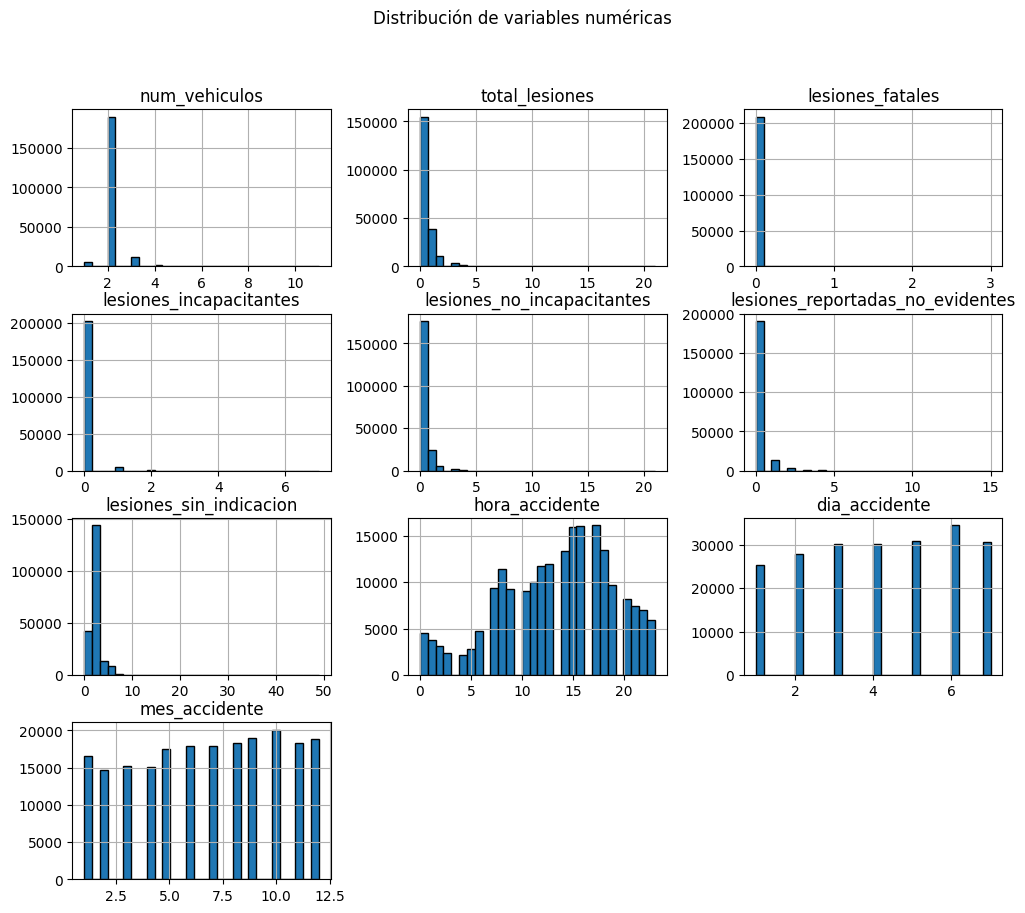

In [15]:
# Visualización de la distribución de algunas variables numéricas
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 6))
df[numerical_cols].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribución de variables numéricas")
plt.show()

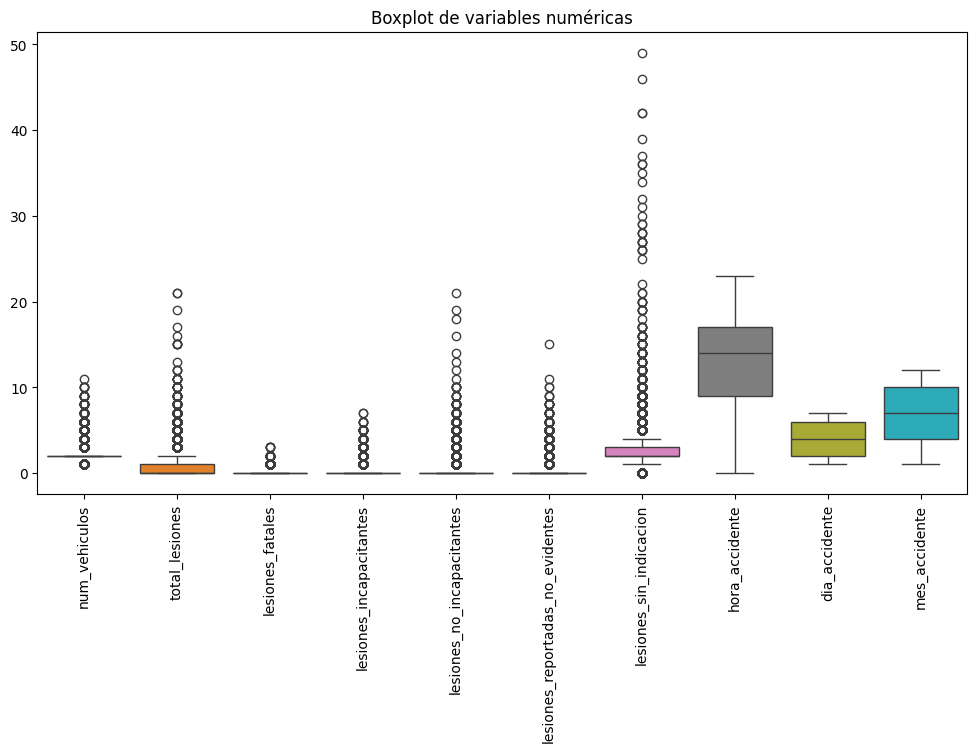

In [ ]:
# Identificación de valores atípicos 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot de variables numéricas")
plt.show()

C:\Users\Leo\AppData\Local\Temp\ipykernel_1048\2254540154.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["condicion_climatica"], order=df["condicion_climatica"].value_counts().index, palette="viridis")


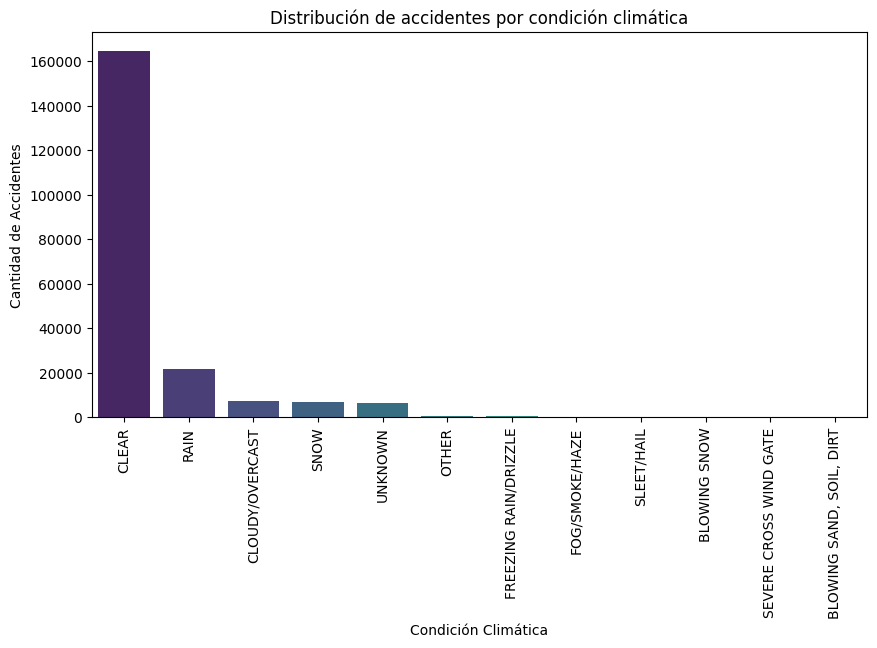

In [22]:
# Análisis de la distribución de accidentes por condición climática
plt.figure(figsize=(10, 5))
sns.countplot(x=df["condicion_climatica"], order=df["condicion_climatica"].value_counts().index, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribución de accidentes por condición climática")
plt.xlabel("Condición Climática")
plt.ylabel("Cantidad de Accidentes")
plt.show()

La mayoría de los accidentes con lesiones ocurren en condiciones climáticas despejadas (CLEAR), seguidas por RAIN, CLOUDY/OVERCAST y SNOW. Esto sugiere que, aunque el mal clima puede aumentar el riesgo, la mayor cantidad de accidentes ocurre en días despejados, posiblemente debido a un mayor volumen de tránsito o una falsa sensación de seguridad por parte de los conductores. 🚗☀️🌧️

C:\Users\Leo\AppData\Local\Temp\ipykernel_1048\252544816.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["condicion_iluminacion"], order=df["condicion_iluminacion"].value_counts().index, palette="viridis")


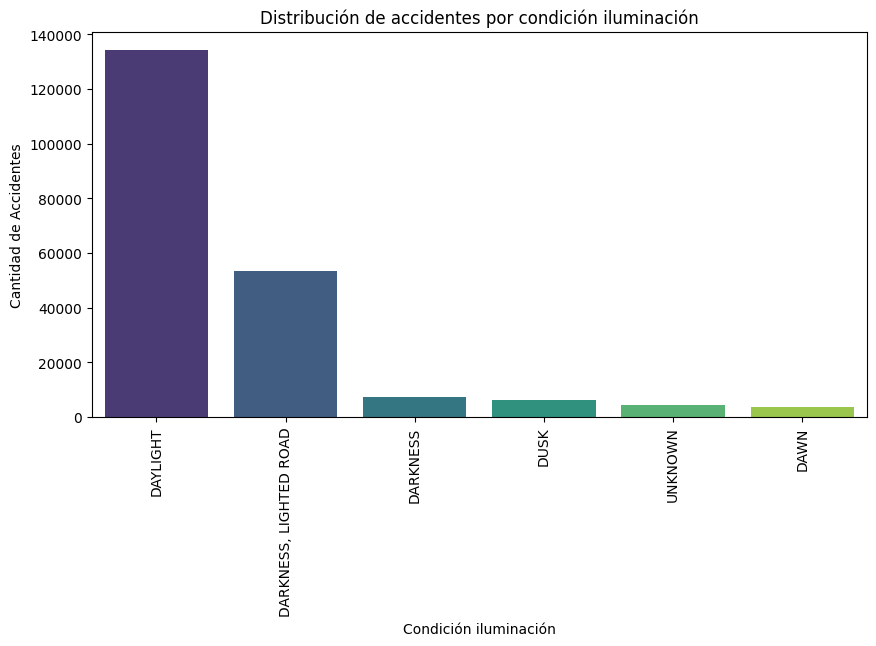

In [ ]:
# Análisis de la distribución de accidentes por condición iluminación
plt.figure(figsize=(10, 5))
sns.countplot(x=df["condicion_iluminacion"], order=df["condicion_iluminacion"].value_counts().index, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribución de accidentes por condición iluminación")
plt.xlabel("Condición iluminación")
plt.ylabel("Cantidad de Accidentes")
plt.show()

Acá tambien podemos ver que la mayoría de los accidentes ocurren en condiciones luminicas normales osea con luz (DAYLIGHT) y carretera iluminada (LIGHTED ROAD), seguidas por algo de oscuridad (DARKNESS). 🚗☀️ 
Al igual que el clima los accidentes ocurren en los días despejados donde el clima y la iluminación son favorables. 

C:\Users\Leo\AppData\Local\Temp\ipykernel_1048\4087567527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["condicion_climatica"], y=df["total_lesiones"], palette="coolwarm")


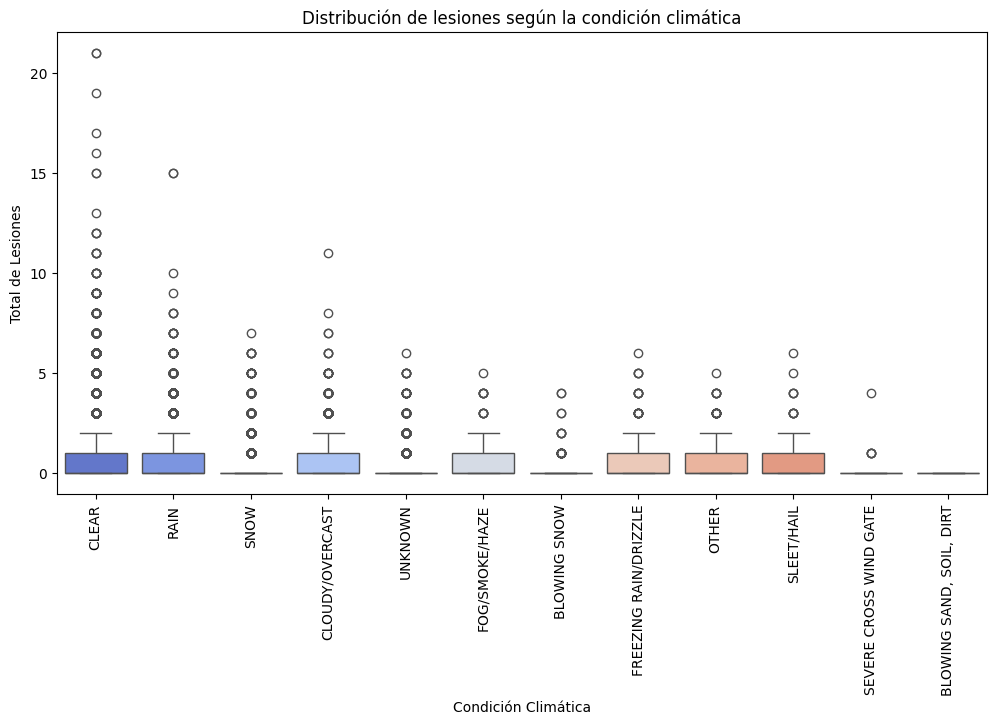

In [ ]:
# Análisis de la severidad de lesiones en diferentes condiciones climáticas (aca lo realizo con boxplot para buscar una visualización distinta de las que vengo usando)
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["condicion_climatica"], y=df["total_lesiones"], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Distribución de lesiones según la condición climática")
plt.xlabel("Condición Climática")
plt.ylabel("Total de Lesiones")
plt.show()

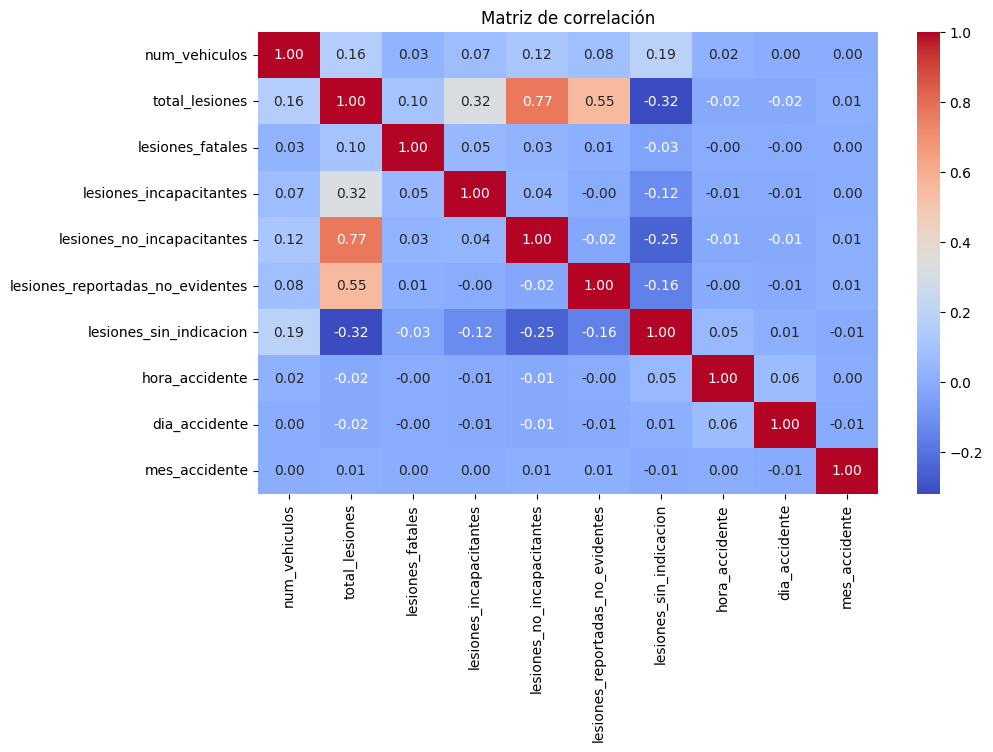

In [24]:
# Correlación entre variables numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

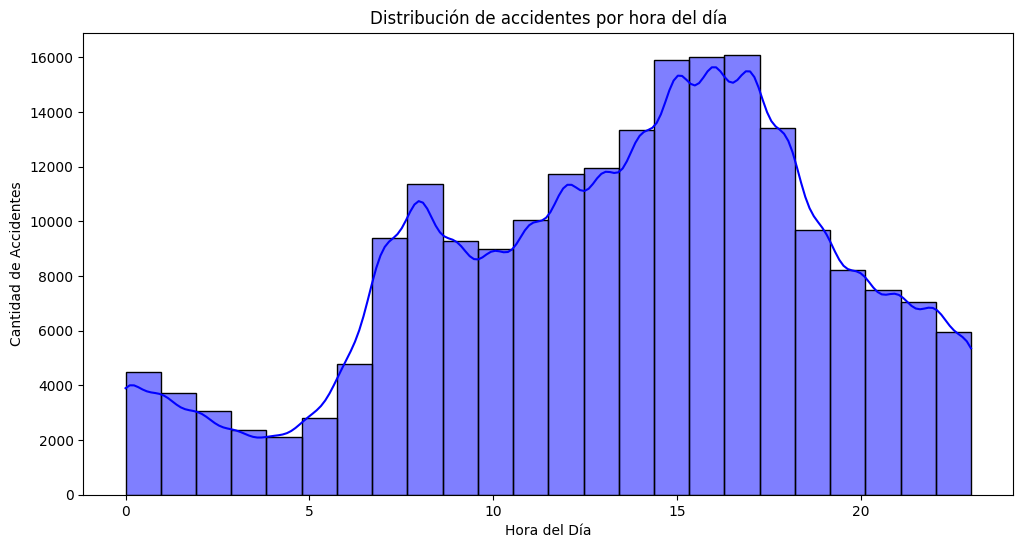

In [25]:
# Análisis de la cantidad de accidentes por hora del día
plt.figure(figsize=(12, 6))
sns.histplot(df["hora_accidente"], bins=24, kde=True, color="blue")
plt.title("Distribución de accidentes por hora del día")
plt.xlabel("Hora del Día")
plt.ylabel("Cantidad de Accidentes")
plt.show()

Se puede ver un aumento significativo en los accidentes a partir de las 6:00 de la mañana, alcanzando su punto máximo entre las 13:00 y 18:00 de la tarde, lo que coincide con los horarios de mayor tráfico debido a las jornadas laborales y escolares. La menor cantidad de accidentes ocurre entre 3:00 y 5:00 de la mañana, cuando la circulación es reducida. 🚗⏰

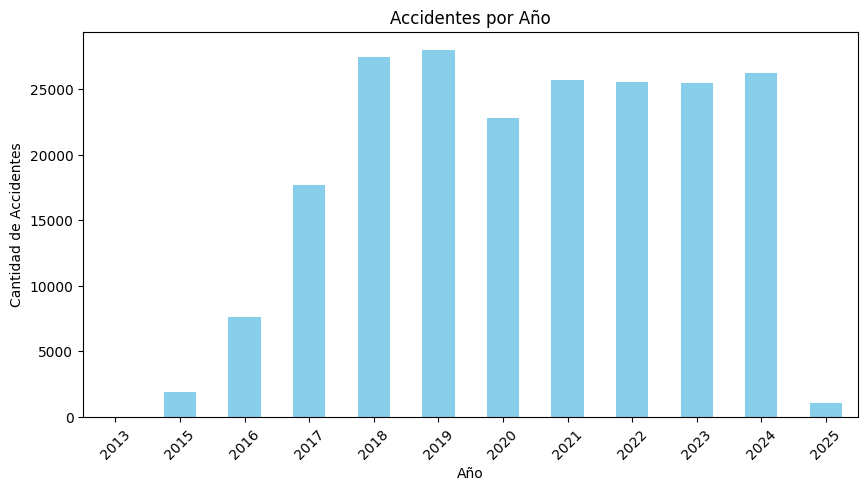

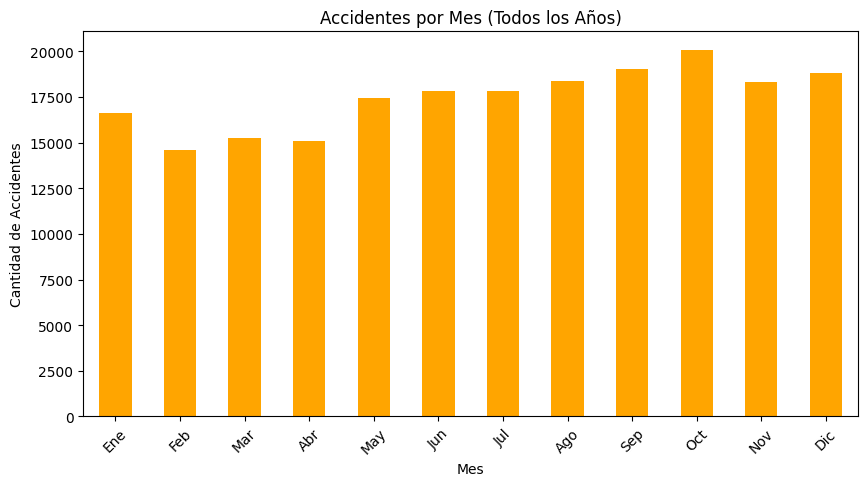

In [ ]:
# Aseguro que la columna sea de tipo datetime
df["fecha_accidente"] = pd.to_datetime(df["fecha_accidente"], format="%m/%d/%Y %I:%M:%S %p")

# Extraigo año y mes
df["año_accidente"] = df["fecha_accidente"].dt.year
df["mes_accidente"] = df["fecha_accidente"].dt.month

# Cuento accidentes por año
accidentes_por_año = df["año_accidente"].value_counts().sort_index()

# Cuento accidentes por mes (sumando de todos los años)
accidentes_por_mes = df["mes_accidente"].value_counts().sort_index()

# Gráfico de accidentes por año
plt.figure(figsize=(10, 5))
accidentes_por_año.plot(kind="bar", color="skyblue")
plt.title("Accidentes por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Accidentes")
plt.xticks(rotation=45)
plt.show()

# Gráfico de accidentes por mes
plt.figure(figsize=(10, 5))
accidentes_por_mes.plot(kind="bar", color="orange")
plt.title("Accidentes por Mes (Todos los Años)")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Accidentes")
plt.xticks(range(12), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"], rotation=45)
plt.show()

Se identificaron ciertos años con un mayor número de accidentes, lo que podría estar relacionado con factores como el crecimiento poblacional o cambios en la infraestructura vial. Además, los meses con mayor cantidad de siniestros podria coincidir con periodos de mayor movilidad, como vacaciones y fines de año.

Voy a categorizar la hora del accidente en franjas horarias: madrugada, mañana, tarde, noche.
y agrupar el nivel de daño en categorías: "Leve", "Moderado", "Grave".

In [ ]:
# Creo una variable de franjas horarias
def categorizar_hora(hora):
    if 0 <= hora < 6:
        return "Madrugada"
    elif 6 <= hora < 12:
        return "Mañana"
    elif 12 <= hora < 18:
        return "Tarde"
    else:
        return "Noche"

df["franja_horaria"] = df["hora_accidente"].apply(categorizar_hora)

# Agrupar nivel de daño
df["categoria_daño"] = df["nivel_daño"].apply(lambda x: "Leve" if "$500 OR LESS" in x else "Moderado" if "$501 - $1,500" in x else "Grave")


print("\nNuevas características creadas:")
print(df[["franja_horaria", "categoria_daño"]].head())


Nuevas características creadas:
  franja_horaria categoria_daño
0          Tarde       Moderado
1      Madrugada          Grave
2         Mañana       Moderado
3          Noche          Grave
4          Tarde       Moderado


Este estudio resalta la importancia de analizar los datos históricos de accidentes para identificar patrones y tomar decisiones informadas en materia de seguridad vial. Los resultados obtenidos pueden servir como base para implementar políticas públicas, campañas de concientización y medidas de infraestructura orientadas a reducir la cantidad de accidentes y su gravedad.